In [1]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c sejong-ai-challenge-p1

  0% 0.00/4.74M [00:00<?, ?B/s]
100% 4.74M/4.74M [00:00<00:00, 78.6MB/s]
 26% 5.00M/19.0M [00:00<00:00, 52.0MB/s]
100% 19.0M/19.0M [00:00<00:00, 93.1MB/s]
  0% 0.00/72.8k [00:00<?, ?B/s]
100% 72.8k/72.8k [00:00<00:00, 77.9MB/s]


In [3]:
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [4]:
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv")
test=pd.read_csv('test.csv')
submit=pd.read_csv('sample_submission.csv')

train['label']=train['label'].apply(lambda x:'2' if x=='missing' else x)
train['label']=train['label'].apply(lambda x:'10' if x=='NAN' else x)

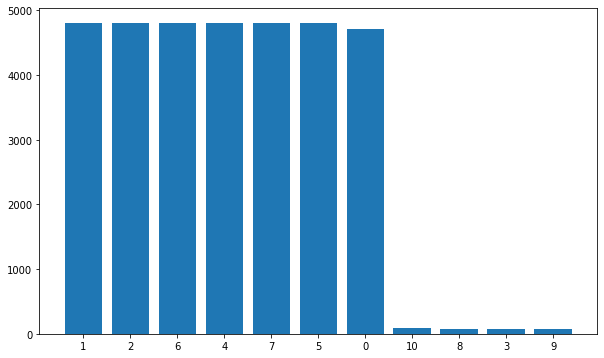

In [5]:
import matplotlib.pyplot as plt

temp=train['label'].value_counts()
fig,ax=plt.subplots(1,1,figsize=(10,6))
ax.bar(temp.index,temp)
plt.show()

In [14]:
y=train['label'].astype(int).values
X=train.drop(['id','label'],axis=1).values

In [8]:
X_test=test.drop('id',axis=1).values

In [74]:
X_tr = X.astype('float32')/255
X_test=X_test.astype('float32')/255

X_tr = pd.DataFrame(X_tr)
X_ovr = X_tr.values
X_train_ovr = X_ovr.reshape(-1,28,28,1)

X_test = pd.DataFrame(X_test)
X_test = X_test.values
X_test = X_test.reshape(-1,28,28,1)

In [23]:
import torch
import torchvision

from torch import nn, optim
from torch.utils.data import DataLoader,TensorDataset
import torch.nn as nn

In [26]:
#device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [60]:
'''
이 셀은 쓰지 않음
from keras.applications.vgg16 import VGG16
from keras.layers import *

img_size_target = 224
img_input = Input(shape=(img_size_target, img_size_target, 1))
img_conc = Concatenate()([img_input, img_input, img_input])  
model = VGG16(input_tensor=img_conc, classes = 11, weights = None)
'''

In [69]:
from keras import optimizers, initializers, regularizers, metrics
from keras.models import Model

In [101]:
#https://eremo2002.tistory.com/55
input_tensor = Input(shape=(28, 28, 1), dtype='float32', name='input')
 
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(input_tensor)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
#x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Flatten()(x)
x = layers.Dense(4096, kernel_initializer='he_normal')(x)
x = layers.Dense(2048, kernel_initializer='he_normal')(x)
x = layers.Dense(1024, kernel_initializer='he_normal')(x)
output_tensor = layers.Dense(11, activation='softmax')(x)

In [102]:
myvgg = Model(input_tensor, output_tensor)
myvgg.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 128)         0   

In [103]:
Adam=tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-1, amsgrad=False,name='Adam')
myvgg.compile(
    optimizer=Adam,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

y_pred_tr=myvgg.fit(X_train_ovr,y_tr_lb,epochs=15,batch_size=32,validation_split=0.2)

Epoch 1/15
846/846 [==============================] - 31s 34ms/step - loss: 83.3268 - accuracy: 0.4804 - val_loss: 71.0076 - val_accuracy: 0.7797
Epoch 2/15
846/846 [==============================] - 29s 34ms/step - loss: 66.6352 - accuracy: 0.7762 - val_loss: 53.7971 - val_accuracy: 0.8041
Epoch 3/15
846/846 [==============================] - 28s 34ms/step - loss: 49.9847 - accuracy: 0.8165 - val_loss: 39.5320 - val_accuracy: 0.8245
Epoch 4/15
846/846 [==============================] - 29s 34ms/step - loss: 36.6374 - accuracy: 0.8301 - val_loss: 28.7478 - val_accuracy: 0.8460
Epoch 5/15
846/846 [==============================] - 29s 34ms/step - loss: 26.6301 - accuracy: 0.8443 - val_loss: 20.8598 - val_accuracy: 0.8567
Epoch 6/15
846/846 [==============================] - 28s 34ms/step - loss: 19.3378 - accuracy: 0.8474 - val_loss: 15.1605 - val_accuracy: 0.8593
Epoch 7/15
846/846 [==============================] - 29s 34ms/step - loss: 14.0840 - accuracy: 0.8474 - val_loss: 11.0883 -

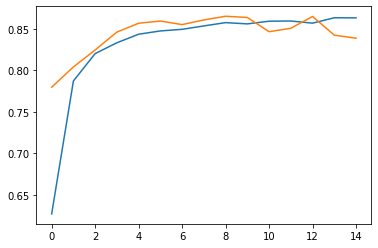

In [104]:
try:
    plt.plot(y_pred_tr.history['accuracy'])
    plt.plot(y_pred_tr.history['val_accuracy'])
except KeyError:
 plt.plot(y_pred_tr.history['accuracy'])
 plt.plot(y_pred_tr.history['val_accuracy'])
 plt.title('Accuracy vs. epochs')
 plt.ylabel('Loss')
 plt.xlabel('Epoch')
 plt.legend(['Training'], loc='lower right')
 plt.show()

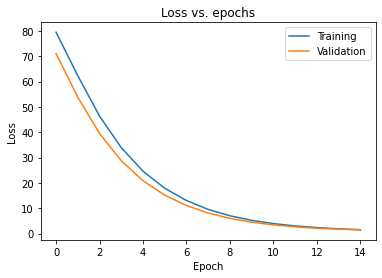

In [105]:
plt.plot(y_pred_tr.history['loss'])
plt.plot(y_pred_tr.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [106]:
y_pred = myvgg.predict(X_test, batch_size=32)
y_pred1 =lb.inverse_transform(y_pred)
y_pred1

array([2, 6, 4, ..., 5, 6, 1])

In [107]:
submit['label']=y_pred1
submit

,id,label
0,11,2
1,15,6
2,17,4
3,21,7
4,22,4
...,...,...
8455,59970,7
8456,59971,5
8457,59982,5
8458,59986,6


In [108]:
submit.to_csv("submission.csv", index = False, header = True)

In [109]:
!kaggle competitions submit -c sejong-ai-challenge-p1 -f submission.csv -m "VGG"

100% 64.5k/64.5k [00:00<00:00, 108kB/s]
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/kaggle/cli.py", line 64, in main
    print(out, end='')
UnicodeEncodeError: 'latin-1' codec can't encode characters in position 46-47: ordinal not in range(256)
